Purpose: create monthly albedo files from daily albedo files and put in new directory
- "regrid_geo_sinu" kernel used on HPC 

In [71]:
import os
import datetime
from dateutil.relativedelta import relativedelta
import xarray as xr
import rioxarray as rxr
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
import pandas as pd
import rasterio

In [5]:
# user input data
modis_directory = '/scratch/kojoseph/modis/mcd43gf/bsa_only'
output_directory = '/scratch/kojoseph/modis/mcd43gf/bsa_only/monthly'

In [3]:
file1 = 'MCD43GF_bsa_shortwave_183_2015_V006.hdf'
#ds1 = rxr.open_rasterio(modis_directory + '/' + file1, masked = True)
ds1 = rxr.open_rasterio(modis_directory + '/' + file1, masked = True) 
ds1

<xarray.DataArray (band: 1, y: 21600, x: 43200)>
[933120000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 90.0 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
    spatial_ref  int64 0
Attributes:
    scale_factor:  0.001
    add_offset:    0.0
    long_name:     Gapfilled BRDF/Albedo data from V006 MCD43D

In [4]:
ds1_slice = ds1.sel(band=1, x=slice(-119.6,-116.2), y=slice(35.2,32.2))
ds1_slice

<xarray.DataArray (y: 360, x: 408)>
[146880 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -119.6 -119.6 -119.6 ... -116.2 -116.2 -116.2
  * y            (y) float64 35.2 35.19 35.18 35.17 ... 32.23 32.22 32.21 32.2
    spatial_ref  int64 0
Attributes:
    scale_factor:  0.001
    add_offset:    0.0
    long_name:     Gapfilled BRDF/Albedo data from V006 MCD43D

In [5]:
file2 = 'MCD43GF_bsa_shortwave_182_2016_V006.hdf'
ds2 = rxr.open_rasterio(modis_directory + '/' + file2, masked = True) 
ds2

<xarray.DataArray (band: 1, y: 21600, x: 43200)>
[933120000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 90.0 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
    spatial_ref  int64 0
Attributes:
    scale_factor:  0.001
    add_offset:    0.0
    long_name:     Gapfilled BRDF/Albedo data from V006 MCD43D

In [6]:
ds2_slice = ds2.sel(band=1, x=slice(-119.6,-116.2), y=slice(35.2,32.2))
ds2_slice

<xarray.DataArray (y: 360, x: 408)>
[146880 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -119.6 -119.6 -119.6 ... -116.2 -116.2 -116.2
  * y            (y) float64 35.2 35.19 35.18 35.17 ... 32.23 32.22 32.21 32.2
    spatial_ref  int64 0
Attributes:
    scale_factor:  0.001
    add_offset:    0.0
    long_name:     Gapfilled BRDF/Albedo data from V006 MCD43D

In [7]:
ds_1_2 = xr.concat([ds1_slice, ds2_slice], dim='day')

In [8]:
ds_1_2.sel(day=0)

<xarray.DataArray (y: 360, x: 408)>
array([[245., 251., 252., ..., 143., 145., 144.],
       [231., 225., 237., ..., 137., 147., 159.],
       [233., 228., 234., ..., 135., 151., 165.],
       ...,
       [ nan,  nan,  nan, ..., 116., 123., 118.],
       [ nan,  nan,  nan, ..., 103., 118., 126.],
       [ nan,  nan,  nan, ...,  98., 104., 114.]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 -119.6 -119.6 -119.6 ... -116.2 -116.2 -116.2
  * y            (y) float64 35.2 35.19 35.18 35.17 ... 32.23 32.22 32.21 32.2
    spatial_ref  int64 0
Attributes:
    scale_factor:  0.001
    add_offset:    0.0
    long_name:     Gapfilled BRDF/Albedo data from V006 MCD43D

In [9]:
ds_1_2.sel(day=1)

<xarray.DataArray (y: 360, x: 408)>
array([[231., 252., 255., ..., 148., 149., 153.],
       [215., 217., 237., ..., 140., 148., 168.],
       [225., 223., 229., ..., 139., 152., 168.],
       ...,
       [ nan,  nan,  nan, ..., 119., 125., 121.],
       [ nan,  nan,  nan, ..., 103., 117., 127.],
       [ nan,  nan,  nan, ..., 100., 106., 118.]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 -119.6 -119.6 -119.6 ... -116.2 -116.2 -116.2
  * y            (y) float64 35.2 35.19 35.18 35.17 ... 32.23 32.22 32.21 32.2
    spatial_ref  int64 0
Attributes:
    scale_factor:  0.001
    add_offset:    0.0
    long_name:     Gapfilled BRDF/Albedo data from V006 MCD43D

In [10]:
# test: compute average of ds_1_2 over "day" variable 
ds_mean = ds_1_2.mean(dim = 'day')
ds_mean

<xarray.DataArray (y: 360, x: 408)>
array([[238. , 251.5, 253.5, ..., 145.5, 147. , 148.5],
       [223. , 221. , 237. , ..., 138.5, 147.5, 163.5],
       [229. , 225.5, 231.5, ..., 137. , 151.5, 166.5],
       ...,
       [  nan,   nan,   nan, ..., 117.5, 124. , 119.5],
       [  nan,   nan,   nan, ..., 103. , 117.5, 126.5],
       [  nan,   nan,   nan, ...,  99. , 105. , 116. ]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 -119.6 -119.6 -119.6 ... -116.2 -116.2 -116.2
  * y            (y) float64 35.2 35.19 35.18 35.17 ... 32.23 32.22 32.21 32.2
    spatial_ref  int64 0

In [15]:
years = ['2015', '2016']
for year in years:
    print(year)
    print(type(year))

2015
<class 'str'>
2016
<class 'str'>


In [44]:
'''
Create a list of lists
- lists of files grouped by month
- this code will only work if list_of_files is SORTED!!!
'''
list_of_years = ['2015', '2016']
# get ordered list of all files in modis directory
list_of_files = sorted(filter(lambda x: os.path.isfile(os.path.join(modis_directory, x)), os.listdir(modis_directory)))
first_file = True
files_by_month = []
file_group = []
for this_year in list_of_years:
    for file in list_of_files:
        # check if file is of current year
        year_tag = "_" + this_year + "_"
        if year_tag in file:
            # extract year and month of file
            year_string = file[26:30]
            julian_day_string = file[22:25]
            date = datetime.datetime.strptime("1/1/" + year_string, "%m/%d/%Y") + \
                datetime.timedelta(int(julian_day_string) - 1)
            date_string = str(date)
            month_string = date_string[5:7]
            month = int(month_string)
            year = int(year_string)
            julian_day = int(julian_day_string)

            # append row to dataframe
            if first_file:
                file_group.append(file)
                first_file = False
                current_month = month
            else:
                if month == current_month:
                    file_group.append(file)
                    current_month = month
                else:
                    files_by_month.append(file_group)
                    file_group = []
                    file_group.append(file)
                    current_month = month
        # if file is not of current year
        else:
            pass

# append file group of files
files_by_month.append(file_group)

# # test print files_by_month list
# print(len(files_by_month))
# print(files_by_month[23])

24
['MCD43GF_bsa_shortwave_336_2016_V006.hdf', 'MCD43GF_bsa_shortwave_337_2016_V006.hdf', 'MCD43GF_bsa_shortwave_338_2016_V006.hdf', 'MCD43GF_bsa_shortwave_339_2016_V006.hdf', 'MCD43GF_bsa_shortwave_340_2016_V006.hdf', 'MCD43GF_bsa_shortwave_341_2016_V006.hdf', 'MCD43GF_bsa_shortwave_342_2016_V006.hdf', 'MCD43GF_bsa_shortwave_343_2016_V006.hdf', 'MCD43GF_bsa_shortwave_344_2016_V006.hdf', 'MCD43GF_bsa_shortwave_345_2016_V006.hdf', 'MCD43GF_bsa_shortwave_346_2016_V006.hdf', 'MCD43GF_bsa_shortwave_347_2016_V006.hdf', 'MCD43GF_bsa_shortwave_348_2016_V006.hdf', 'MCD43GF_bsa_shortwave_349_2016_V006.hdf', 'MCD43GF_bsa_shortwave_350_2016_V006.hdf', 'MCD43GF_bsa_shortwave_351_2016_V006.hdf', 'MCD43GF_bsa_shortwave_352_2016_V006.hdf', 'MCD43GF_bsa_shortwave_353_2016_V006.hdf', 'MCD43GF_bsa_shortwave_354_2016_V006.hdf', 'MCD43GF_bsa_shortwave_355_2016_V006.hdf', 'MCD43GF_bsa_shortwave_356_2016_V006.hdf', 'MCD43GF_bsa_shortwave_357_2016_V006.hdf', 'MCD43GF_bsa_shortwave_358_2016_V006.hdf', 'MCD43G

In [47]:
'''
Now that we have files_by_month, we can iterate through the list of list
and then create a grouped xarray object for each iteration

Then save each xarray as monthly averages:
e.g., 'albedo_modis_2015_01'

Output will be monthly average in MODIS grid. Still need to regrid in further code below.
'''
# variable_list = ['Albedo_WSA_shortwave', 'Albedo_BSA_shortwave'] # variables we want to extract
for group in files_by_month:
    ds_list = []
    for file in group:
        ds = rxr.open_rasterio(modis_directory + '/' + file, masked = True)
        ds_slice = ds.sel(band=1, x=slice(-119.6,-116.2), y=slice(35.2,32.2)) # subset of global domain (i.e., just socal)
        ds_list.append(ds_slice) # append data to list
    
    # calculate the monthly mean excluding NaNs
    ds_concat = xr.concat(ds_list, dim = 'day_index')
    monthly_mean = ds_concat.mean(dim = 'day_index', skipna = True)
    
    # save monthly average as netcdf file
    year_string = file[26:30]
    julian_day_string = file[22:25]
    date = datetime.datetime.strptime("1/1/" + year_string, "%m/%d/%Y") + \
        datetime.timedelta(int(julian_day_string) - 1)
    date_string = str(date)
    month_string = date_string[5:7]
    monthly_mean.to_netcdf(output_directory + '/albedo_modis_' +
                           year_string + '_' + month_string + '.nc', engine='netcdf4')

In [6]:
monthly_albedo_list = []
for file in sorted(filter(lambda x: os.path.isfile(os.path.join(output_directory, x)), os.listdir(output_directory))):
    full_path = output_directory + "/" + file
    monthly_albedo_list.append(full_path)
print(monthly_albedo_list[0])

/scratch/kojoseph/modis/mcd43gf/bsa_only/monthly/albedo_modis_2015_01.nc


In [8]:
# test open one of the netcdf files
ds = xr.open_mfdataset(monthly_albedo_list[0])
ds

<xarray.Dataset>
Dimensions:                        (x: 408, y: 360)
Coordinates:
    band                           int64 ...
  * x                              (x) float64 -119.6 -119.6 ... -116.2 -116.2
  * y                              (y) float64 35.2 35.19 35.18 ... 32.21 32.2
    spatial_ref                    int64 ...
Data variables:
    __xarray_dataarray_variable__  (y, x) float32 dask.array<chunksize=(360, 408), meta=np.ndarray>

In [9]:
# concatenate all monthly averages into on netcdf file
ds = xr.open_mfdataset(monthly_albedo_list, combine = "nested", concat_dim = "time")
ds.to_netcdf(output_directory + '/monthly_albedo_combined.nc', engine = 'netcdf4')

## Regrid to WRF grid 

hdf-eos to net-cdf

@author: joseph ko

In [2]:
"""
Regrid to WRF grid 

hdf-eos to net-cdf

@author: joseph ko
"""
import xesmf as xe
import re
import pyproj
import shutil
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

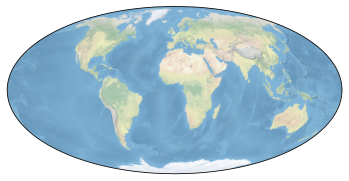

In [4]:
# testing cartopy and matplotlib
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

In [6]:

# ======================================================================
# User input data
# ======================================================================
modis_directory = '/scratch/kojoseph/modis/mcd43gf/bsa_only/monthly'
wrf_input_directory = '/project/banweiss_274/kojoseph/wrfinputs_2015'
output_directory = '/scratch/kojoseph/modis/mcd43gf/bsa_only/regridded'
#regridder_file = 'mod13_to_wrf_regrid_weights.nc'

## Regrid MCD43GF files to WRF grid

In [ ]:
# create list of all modis files and wrf files
modis_path_list = glob.glob(modis_directory + '/albedo*')
wrf_path_list = glob.glob(wrf_input_directory + '/*')

# create regrid weights and save to file for re-use later
regridder_output_path = '/scratch/kojoseph/modis/mcd43gf_to_wrf_regrid_weights.nc'
tmp_albedo_file = xr.open_dataarray(modis_path_list[0])
lon, lat = np.meshgrid(tmp_albedo_file['x'], tmp_albedo_file['y'])
tmp_albedo_file = tmp_albedo_file.assign_coords({'lon': (['y', 'x'], lon),
                       'lat': (['y', 'x'], lat)})
tmp_wrf_file = xr.open_dataset(wrf_path_list[0])
tmp_wrf_file = tmp_wrf_file.rename({'XLAT':'lat', 'XLONG':'lon'})
tmp_wrf_file = tmp_wrf_file.squeeze('Time')
# print(tmp_albedo_file)
# print(tmp_wrf_file)

regridder = xe.Regridder(tmp_albedo_file, tmp_wrf_file, 'bilinear', 
                         filename = regridder_output_path)



In [31]:
modis_path_list[0][-5:-3]

'09'

In [34]:
# loop through and regrid all files in directory
for file in modis_path_list:
    year_str = file[-10:-6]
    month_str = file[-5:-3]
    modis_albedo = xr.open_dataarray(file)
    modis_albedo = modis_albedo*0.001
    lon, lat = np.meshgrid(modis_albedo['x'], modis_albedo['y'])
    modis_albedo = modis_albedo.assign_coords({'lon': (['y', 'x'], lon),
                       'lat': (['y', 'x'], lat)})
    # regrid to WRF grid
    regridder_reuse = xe.Regridder(modis_albedo, tmp_wrf_file,'bilinear', periodic=False, 
                                   reuse_weights=True, filename = regridder_output_path)

    modis_albedo_out = regridder_reuse(modis_albedo)
    # print(modis_albedo_out)

    # write regridded data as netcdf file
    modis_albedo_out.to_netcdf(path = output_directory + "/albedo_regridded_" +
                               year_str + "_" + month_str + ".nc", mode = 'w')

## Replace default albedo and GVF in WRF input files

In [104]:
'''
Example of files names:
regridded albedo -> albedo_regridded_2015_01.nc
regridded gvf -> wrfinput_d03_2015_01.nc
wrf input -> wrfinput_d03_201501
'''
wrf_output_directory = '/project/banweiss_274/kojoseph/wrfinputs_2015/modis_albedo_gvf'
regridded_albedo_dir = '/scratch/kojoseph/modis/mcd43gf/bsa_only/regridded'
regridded_gvf_dir = '/scratch/kojoseph/modis/mod13a3/regridded'
for file in os.listdir(wrf_output_directory):    
    # year/month of current file
    month_str = file[-2:]
    year_str = file[-6:-2]
    wrf_ds = xr.open_dataset(wrf_output_directory + '/' + file, engine = 'netcdf4')
    albedo_default = wrf_ds['ALBBCK']
    landmask = wrf_ds['LANDMASK']
    gvf_file = regridded_gvf_dir + '/wrfinput_d03_' + year_str + '_' + month_str + '.nc'
    albedo_file = regridded_albedo_dir + '/albedo_regridded_' + year_str + '_' + month_str + '.nc'
    wrf_modis_gvf = xr.open_dataset(gvf_file)
    modis_gvf = wrf_modis_gvf['VEGFRA'][:]
    modis_albedo = xr.open_dataarray(albedo_file)
    modis_albedo = modis_albedo.where(landmask!=0)
    modis_albedo = modis_albedo.combine_first(albedo_default) # replace with default values if NA
    # replace default values 
    wrf_input_new = Dataset(wrf_output_directory + '/' + file, 'r+')
    # print(modis_gvf.shape)
    # print(wrf_input_new['VEGFRA'][:].shape)
    # print(wrf_input_new['ALBBCK'][:].shape)
    # print(modis_albedo[:,:,0].shape)
    wrf_input_new['VEGFRA'][:] = modis_gvf
    wrf_input_new['ALBBCK'][0,:] = modis_albedo[:,:,0]
    wrf_input_new.close()

In [ ]:
# # iterate through all daily modis files in directory
# count = 1
# for entry in os.scandir(modis_directory):
#     if count < 2:
#         # extract year and month of file
#         print(file)
#         year_string = entry.name[9:13]
#         julian_day_string = entry.name[13:16]
#         date_temp = datetime.datetime.strptime("1/1/" + year_string, "%m/%d/%Y") + \
#             datetime.timedelta(int(julian_day_string) - 1)
#         date_temp_string = str(date_temp)
#         print(date_temp_string)
#         month_string = date_temp_string[5:7]
#         print(year_string)
#         print(month_string)
        
#         # open modis file 
#         modis_ds = rxr.open_rasterio(entry.path, masked = True) 
#         print(list(modis_ds))
        
#         # name of monthly average file
#         monthly_avg_file = output_directory + '/mcd43a4_' + year_string + '_' + month_string + '.nc'
#         print(monthly_avg_file)
        
#         if os.path.exists(monthly_avg_file):
#             # open existing file and update running average
#             pass
#         else:
#             # create xarray and then save as netcdf file
#             pass
            
        
#     count += 1